빅쿼리에서 분석한 데이터를 코랩으로 바로 연동시켜 줌!!!!

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'braided-gravity-379810' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=braided-gravity-379810:US:bquxjob_7cad0998_186b6bbab60)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job
# 어떤 쿼리 사용했는지 알 수 있음
job = client.get_job('bquxjob_7cad0998_186b6bbab60') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT 
  position_id
  , position
  , SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(0)] as responsibilities
  , SPLIT(SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(0)] as requirments
  , SPLIT(SPLIT(SPLIT(SPLIT(jd, '주요업무')[safe_offset(1)], '자격요건')[safe_offset(1)], '우대사항')[safe_offset(1)], '혜택 및 복지')[safe_offset(0)] as prefence
  , annual_from
  , annual_to
  , GENERATE_ARRAY(annual_from, annual_to, 1) AS target_annual

  
FROM `braided-gravity-379810.wanted.wanted_position` ;



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job
# 쿼리 결과 알려달라 하기 
job = client.get_job('bquxjob_7cad0998_186b6bbab60') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
# int로 설정해줬던 값들
results.describe()

,position_id,annual_from,annual_to
count,388.000000,388.000000,388.000000
mean,86662.932990,2.548969,11.293814
std,32339.246062,1.735828,15.518307
min,33147.000000,0.000000,1.000000
25%,56930.250000,1.000000,5.000000
50%,87868.500000,3.000000,10.000000
75%,110374.500000,3.000000,10.000000
max,146629.000000,10.000000,99.000000


[krwordrank](https://lovit.github.io/nlp/2018/04/16/krwordrank/)

In [ ]:
# knlpy 설정은 힘들기 때문에 이걸로 대신함
# word cloud 형성을 위한 패키지 설치
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from krwordrank.word import KRWordRank
import numpy as np

In [ ]:
# 복사본 만들어서 사용하기
df =  results.copy()
df.head(3)

In [ ]:
# 'NoneType' object has no attribute 'split' 발생하는 이유 
df['responsibilities'] = df['responsibilities'].replace(np.nan, '없음')
df['requirments'] = df['requirments'].replace(np.nan, '없음')
df['prefence'] = df['prefence'].replace(np.nan, '없음')

In [ ]:
# 주요업무에서 가장 많이 반복된 단어가 무엇일지를 시각화 해서 파악하는 것임 
# 분석가로써 해야 할 일들이 무엇인지 파악이 가능함 

# 한 뭉탱이로 합쳐주는 역할을 해줌
# 주요업무의 값들을 리스트로 변화시켜주면서 한 뭉탱이로 만들어 준다. 
texts = df['responsibilities'].values.tolist()
print(texts)

['\n1. 데이터 추출 및 분석 지원\n\n• 실무팀 과제 수행에 필요한 데이터 추출 및 분석을 지원합니다.\n• 프로덕트 개선을 위한 A/B 테스트 설계에 참여하고 결과를 분석합니다.\n\n\n2. ad-hoc 데이터 분석 수행\n\n• 주요 비즈니스 의사결정에 필요한 ad-hoc 데이터 분석을 수행합니다. \n• 주요 KPI 모니터링 및 이슈 발생 시 deep-dive하여 데이터를 분석합니다.\n\n\n3. 데이터 시각화 및 분석 환경 개선\n\n• 성과 모니터링에 필요한 대시보드를 만들고 관리합니다.\n• 데이터 분석 환경을 개선하고 관리합니다.\n\n', '\n• 전사적으로 데이터에 기반한 최적의 서비스적인, 사업적인 의사결정을 내릴 수 있도록 하는 일련의 활동들을 lead, guide, and support\n• 분석을 통한 데이터에 기반한 intelligence와 action item 도출\n• Intelligence와 action item이 실제 서비스에 잘 반영될 수 있도록 사업/서비스기획/디자인/개발팀 등과 적극적 협력\n• Action item의 검증을 위한 적절한 데이터를 수집하기 위한 로거 정의 및 설계\n• 각 서비스의 핵심 지표에 대한 정의 및 동료들에게 인사이트를 제공할 수 있는 대시보드 제작 / 모니터링 수행\n• 동료들의 데이터 추출 요청에 대한 지원\n\n', '\n• 데이터분석팀 팀원들과 함께 머신러닝 기반 자동 재배치 시스템 개발 프로젝트에서 예측 모델 수립 작업을 담당합니다.\n• 데이터분석팀의 기존 분석 모델의 개선점을 찾아 함께 개선하는 작업도 수행합니다.\n• 이 외에도 관심 있는 주제에 대해 자유롭게 분석을 수행하여, 실제 전략에 반영할 수 있는 인사이트를 발굴하실 수 있습니다.\n\n', '\n[콴다 Data Analyst의 역할은?] \n• 목적 조직이 맡은 서비스/비즈니스 주제의 성패를 가늠할 수 있는 적절한 최상위 metric을 정의합니다. 최상위 metric은 "최상위"인 만큼 여러가지 요소들이 결합된 복

In [ ]:
# 설정해줘야 하는 값
wordrank_extractor = KRWordRank(
 min_count = 3, # 단어 최소 출현 빈도수
 max_length = 15, # 단어의 character 길이의 최대 값
 verbose = True   #
)

beta = 0.85 # PageRank의 decaying factor beta
max_iter = 10

# 함수 실행 시 키워드, 랭크
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

# 의미없는 글자는 삭제하고 분석 진행함 
# 이거는 분석가의 재량임
stopwords = {'대한','분이면', '있습니다.','분석','데이터', '위한', 'and', '통해', '통한','있는','the','to','in','for','of'}  #걸렀으면 하는 stopwords
passwords = {word:score for word, score in sorted(   
keywords.items(), key=lambda x:-x[1])[:100] if not (word in stopwords)}  #stopwords는 제외된 keywords 탑 300개

# top 30개 많이 반복되는 단어 추출함
for word, ranking in sorted(keywords.items(), key = lambda x : x[1], reverse = True)[:30] : 
  print(word, ranking)

scan vocabs ... 
num vocabs = 6568
done
데이터 59.95301427542361
and 44.268122288583136
분석 40.01318022579672
위한 28.88483351461446
to 16.000535359016066
서비스 15.202630480085666
대한 13.256008684434104
비즈니스 12.546394528844358
통해 12.486987531825356
기반 12.48102392481802
있는 12.15244236890043
the 11.835000124235767
통한 11.609436674208128
of 11.338450011926922
다양한 11.27943657997832
인사이트 10.696588096345518
도출 10.411450488218929
지표 10.296794302156378
개선 9.735041759623096
의사결정을 9.275961712442633
설계 8.46398044553978
이를 8.398359607488668
결과를 7.7756524817194625
business 7.53143728461156
위해 7.339724834843432
client 7.196419317411325
가설을 7.187656907687089
필요한 7.109461869847066
in 6.9229490596803345
A/B 6.859458621780232


In [ ]:
# matplotlib은 한글파일이 지원되지 않음 
#한글폰트 지원이 되지 않기 때문에 별도로 이걸 깔아줘야한다.
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
#mpl.font_manager._rebuild()
#[출처] [Google Colab] 구글 코랩 한글 적용 문제 대응, Matplotlib|작성자 넬티아

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 128215 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


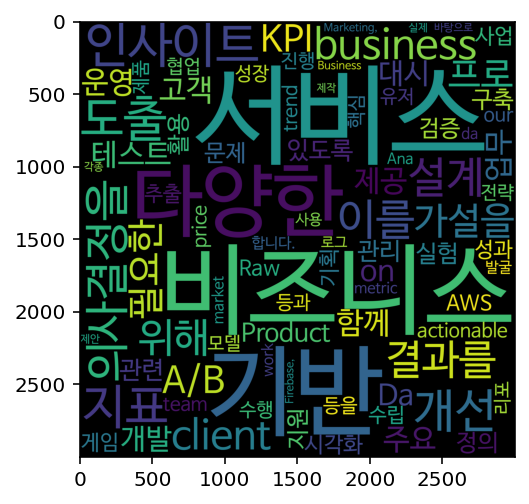

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

wc = WordCloud(font_path = fontpath, width = 1000, height = 1000, scale = 3.0, max_font_size = 250)
gen = wc.generate_from_frequencies(passwords)
plt.figure()
plt.imshow(gen)
plt.imshow(gen)